This notebook is meant for purpose of machine learning for very beginners.

One must have sufficient knowledge of **Pandas** , **Numpy**, **Matplotlib** and **Seaborn** before refrerring to this notebook

Created by **Prashant Brahmbhatt**

#### Importing the necessary libraries.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset from the web through the library itself.

In [209]:
from sklearn.datasets import load_iris

In [210]:
iris = load_iris()

The dataset is returned as a large dictionary

In [211]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Here,  
**data** has the features (what we know ) on which the model learns.   
**target** is the dependent variable (what to predict).  
**feature_name** names of the features we know  
**target_name** are the names of the classes which to predict.  
**DESC** is the information about the dataset.

In [212]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [213]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [214]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [215]:
type(iris['data'])

numpy.ndarray

In [216]:
iris['data'].shape

(150, 4)

In [217]:
X = pd.DataFrame(iris['data'])

In [218]:
y = pd.DataFrame(iris['target'])
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

These are the known values of the dependent variable on which the model will train.

Here the numeric symbols are as :  
0  for **Setosa**  
1  for **Versicolour**  
2  for **Virginica**

In [219]:
iris['target'].shape

(150,)

It is 1 entry per row.

### Splitting the Data

In [220]:
from sklearn.cross_validation import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

By default the ratio is **75%** to **25%**

In [222]:
X_train.shape

(112, 4)

In [223]:
X_test.shape

(38, 4)

#### Forming full data as one 

In [224]:
df = pd.DataFrame(X)

In [225]:
df.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}, inplace= True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Renamed columns for the sake of readability

In [226]:
df = pd.concat([df,y], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


concatenated the target variable column into the features dataframe.

### Visualising

Since more than two dimensions are not easy to plot so **PairPlot** offers a great insight among two features at a time.   
pair plot does not show the interaction
of all of features at once, so some interesting aspects of the data may not be
revealed when visualizing it this way.

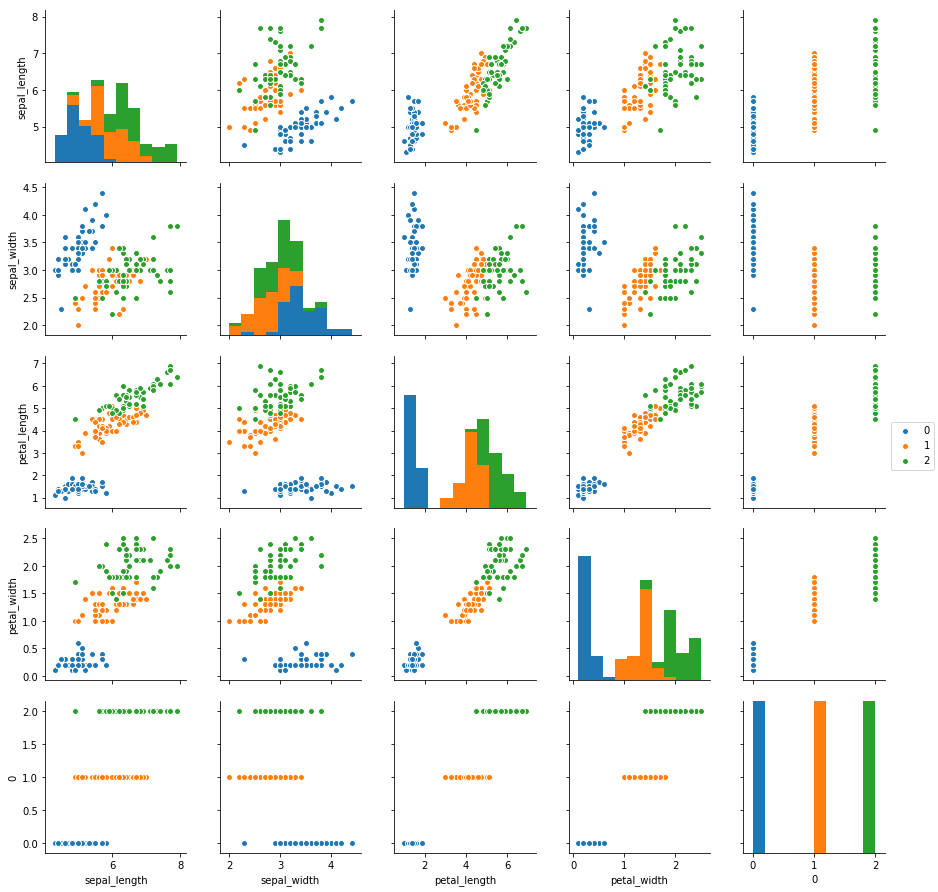

In [227]:
sns.pairplot(df, hue = 0)

Here different colours signify the different types of flowers.

### Building K-Nearest Neighbors Model

The k nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [230]:
knn = KNeighborsClassifier(n_neighbors = 1)

The selection of number of neighbor is a deeper topic. We here use 1 for simplicity.

In [231]:
knn.fit(X_train, y_train)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Fitting the classifier on the train data

In [233]:
predictions = knn.predict(X_test)

In [241]:
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [242]:
iris['target_names'][predictions]

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype='<U10')

### Evaluating the Model

Here the test set comes in play

We can use the score method of the knn object, which will compute the test set
accuracy for us:

In [253]:
knn.score(X_test, y_test)

0.9736842105263158